# Data Preprocessing

We need to ensure our data is clean and to do this we can preprocess the data. We are going to use Colaboratory to load, clean and normalize the numerical data. We will then split the dataset into two sets, namely the training dataset and testing datasetset. The clean data is then stored in the data folder and the name of the two datasets we will require are in that folder namely: train.csv and test.csv.

**Import the libraries**

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns; seaborn.set()

**Import the data**

In [0]:
raw_data = pd.read_csv('googleplaystore.csv')

**Data Wrangling**

In [0]:
#Copy the data to Dataframe
df = raw_data.copy()

#Drop Duplicates
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']
df_dropped_duplicates = df

In [0]:
df_dropped_duplicates.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Convert Categorical Data to Numerics**


1.   App Rating
2.   App Number of Reviews
3.   App Sizes to be in MB (Megabytes)
4.   App Installs
5.   App Price
6.   Android Ver



In [0]:
df = df_dropped_duplicates.copy()
# Convert app rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'])

# Convert app number of reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

# Convert app sizes to be in MB (megabytes)
df.loc[df['Size'] == 'Varies with device', ['Size']]  = np.nan
df.loc[df['Size'].str.contains('M') == True, ['Size']] = pd.to_numeric(df['Size'][df['Size'].str.contains('M') == True].str.replace('M', ''))
# Converting Kb to MB
df.loc[df['Size'].str.contains('k') == True, ['Size']] = pd.to_numeric(df['Size'][df['Size'].str.contains('k') == True].str.replace('k', '')) / 10 ** 3
df['Size'] = pd.to_numeric(df['Size'])

#Convert number of app installs to numeric
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'])

# Convert app price to numeric
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'])

# Get from supported android version as numeric
df.loc[df['Android Ver'] == 'Varies with device', ['Android Ver']]  = np.nan
df.loc[df['Android Ver'].str.contains('.') == True, ['Android Ver']] = df['Android Ver'][df['Android Ver'].str.contains('.') == True].str.split('.').str[0]
df['Android_Ver'] = pd.to_numeric(df['Android Ver'])
df.pop('Android Ver')
df['Android_Ver'] = df['Android_Ver'].astype(str)

**Convert the Ratings**

In [0]:
data = df.copy()
data = data.dropna()

data['Content_Rating'] = data['Content Rating']
data.pop('Content Rating')

data.loc[data['Rating'].astype(float) < 3.5, ['Rating']] = 0
data.loc[data['Rating'].astype(float) >= 3.5, ['Rating']] = 1
data['Rating'] = data['Rating'].astype('int64')
data.describe()

,Rating,Reviews,Size,Installs,Price
count,7023.000000,7.023000e+03,7023.000000,7.023000e+03,7023.000000
mean,0.904457,1.448548e+05,21.763199,4.470532e+06,1.174099
std,0.293985,1.024285e+06,22.729633,2.714532e+07,18.202768
min,0.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,1.000000,8.400000e+01,4.900000,1.000000e+04,0.000000
50%,1.000000,1.545000e+03,13.000000,1.000000e+05,0.000000
75%,1.000000,2.657950e+04,31.000000,1.000000e+06,0.000000
max,1.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


**Normalize the Data**

In [0]:
from scipy import stats

def normalize_boxcox(data):
  # Copy the strictly positive data to posdata
  posdata = data[data > 0]
  
  # Find the optimal Box-Cox transformation, and verify that λ is positive
  bcdata, lam = stats.boxcox(posdata)
  
  x = np.empty_like(data)
  x[data > 0] = bcdata
  x[data == 0] = -1/lam
  return x

**Plot our Data**

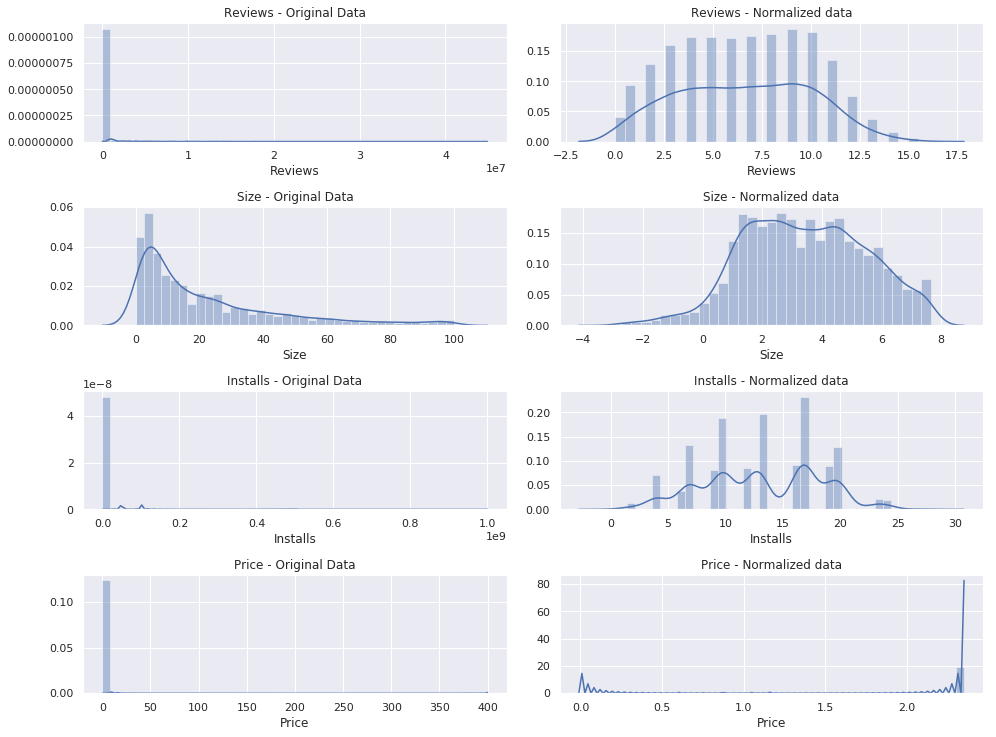

In [0]:
df_normalized = data.copy()

cols = [
  'Reviews',
  'Size',
  'Installs',
  'Price',
]
i = 1
plt.figure(figsize=(15,8))
for col in cols:
  df_normalized[col] = normalize_boxcox(df_normalized[col].values)

  # plot both together to compare
  ax = plt.subplot(6, 2, i)
  ax.figure.set_size_inches(14,15)
  
  sns.distplot(data[col], ax=ax)
  ax.set_title(col + " - Original Data")
  
  i += 1
  ax = plt.subplot(6, 2, i)
  sns.distplot(df_normalized[col], ax=ax)
  ax.set_title(col + " - Normalized data")
  i += 1

plt.tight_layout()
plt.show()

**Split the data into training set and test set**

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_normalized, random_state=0, test_size=0.3)
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)